In [1]:
# Code credit: Saeed Abdul Rahim
# https://medium.com/@saeedAR/smote-and-near-miss-in-python-machine-learning-in-imbalanced-datasets-b7976d9a7a79
import numpy as np
import pandas as pd
import sys
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, \
                            classification_report, roc_auc_score, f1_score, \
                            balanced_accuracy_score
print(f'sys.version = {sys.version}')
print(f'sklearn.__version__ = {sklearn.__version__}')

sys.version = 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
sklearn.__version__ = 0.22.1


In [116]:
#df = pd.read_csv('../../data/csl/onepreg.csv', index_col=0)
#df = pd.read_csv('../../data/csl/onepreg_norm.csv', index_col=0)
X = pd.read_csv('../../data/csl/smote_03_Xresult.csv', index_col=0)
y = pd.read_csv('../../data/csl/smote_03_yresult.csv', usecols=[1])
#X = pd.read_csv('../../data/csl/smote_norm_03_Xresult.csv', index_col=0)
#y = pd.read_csv('../../data/csl/smote_norm_03_yresult.csv', usecols=[1])

In [117]:
#for col in df:
#    if df[col].isna().any():
#        print(col)
#df
for col in X:
    if X[col].isna().any():
        print(col)
X

,Activeherpes,Alcohol,Anteabruption,Anteanemia,Anteasthma,Antebleed3,AnteCHBP,Antechorio,Antefetaldth,Antefetdistress,...,vertex,vertex_new,Momage,Preweight,Admweight,Admtemp,AdmSBP,AdmDBP,AdmFHR,Birthweight1
0,1,1,1,2,1,1,1,1,1,1,...,9,9,37.000000,86.182550,102.511876,98.900000,150.000000,83.000000,138.000000,2919.000000
1,1,1,1,1,1,1,1,1,1,1,...,1,1,36.000000,62.595747,81.646627,98.240000,105.000000,77.000000,138.000000,3830.000000
2,1,1,1,1,1,1,1,1,1,1,...,1,1,34.000000,88.450512,102.511876,95.360000,122.000000,65.000000,138.000000,3580.000000
3,1,1,1,1,1,1,1,1,1,1,...,1,1,31.000000,51.709530,59.874193,97.160000,138.000000,77.000000,138.000000,3225.000000
4,1,1,1,1,1,1,1,1,1,1,...,1,1,21.000000,62.595747,77.110703,97.500000,134.000000,98.000000,150.000000,3758.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194683,1,1,1,1,1,1,1,1,1,1,...,1,1,34.089630,63.252617,73.021989,98.665555,180.594062,109.938511,138.000000,2861.344449
194684,1,1,1,1,1,1,1,1,1,1,...,1,1,24.733681,76.262735,90.555830,97.373368,131.152310,70.087034,138.000000,1697.336811
194685,1,1,1,1,1,1,1,1,1,1,...,1,1,32.790603,78.400245,87.795349,98.478881,133.261746,75.368233,138.000000,1544.738254
194686,1,1,1,1,1,1,1,1,1,1,...,1,1,23.720775,114.055344,123.151172,98.394341,140.833953,84.109458,138.000000,3798.833953


In [105]:
# This removes the continuous variables
#X = X.iloc[:,:-8]
#X

,Activeherpes,Alcohol,Anteabruption,Anteanemia,Anteasthma,Antebleed3,AnteCHBP,Antechorio,Antefetaldth,Antefetdistress,...,pulmonary_embolism9,renal_disease9,renal_disease_comb,spontlabor,threat_new,threatpb9,uscar,version9,vertex,vertex_new
0,1,1,1,2,1,1,1,1,1,1,...,1,1,1,2,1,1,2,1,9,9
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194683,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
194684,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,1
194685,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,2,1,1,1,1,1
194686,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [106]:
#X = df.iloc[:,5:]
#X.drop('depression9', axis=1, inplace=True)
#X.drop('heart_disease9', axis=1, inplace=True)
#X.head()

In [118]:
#y = df['MomNearMiss']
y = y['MomNearMiss']
print(y.shape)
print(X.shape)

(194688,)
(194688, 245)


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=7)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(y_train.value_counts())
print(y_test.value_counts())

1    141764
2      4252
Name: MomNearMiss, dtype: int64
1    47254
2     1418
Name: MomNearMiss, dtype: int64


In [133]:
%%time
#clf = GaussianNB()
#clf = BernoulliNB()
#clf = CategoricalNB()
clf = ComplementNB(norm=True)
print(clf.fit(X_train, y_train))

ComplementNB(alpha=1.0, class_prior=None, fit_prior=False, norm=True)
CPU times: user 1.71 s, sys: 347 ms, total: 2.06 s
Wall time: 527 ms


In [134]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 1.01 s, sys: 177 ms, total: 1.19 s
Wall time: 188 ms


In [135]:
from sklearn.metrics import matthews_corrcoef
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred)}')
print(f'\nClassification Report:\n {classification_report(y_test, y_pred)}')
print(f'ROC_AUC = {roc_auc_score(y_test, y_pred)}')
print(f'MCC = {matthews_corrcoef(y_test, y_pred)}')

[[46188  1066]
 [ 1044   374]]
Accuracy = 0.9566485864562788
Recall = 0.9774410631904178

Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.98      0.98     47254
           2       0.26      0.26      0.26      1418

    accuracy                           0.96     48672
   macro avg       0.62      0.62      0.62     48672
weighted avg       0.96      0.96      0.96     48672

ROC_AUC = 0.6205964131184811
MCC = 0.23939902452120881


In [11]:
print(f'f1_score = {f1_score(y_test, y_pred, average=None)}')
print(f'balanced_accuracy = {balanced_accuracy_score(y_test, y_pred)}')
print(f'ROC_AUC_each = {roc_auc_score(y_test, y_pred, average=None)}')

f1_score = [0.93808466 0.04893177]
balanced_accuracy = 0.7580260342451903
ROC_AUC_each = 0.7580260342451903


In [12]:
import sklearn
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

In [13]:
print(sklearn.__version__)

0.22


In [14]:
from sklearn.metrics import average_precision_score
y_score = clf.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

AttributeError: 'GaussianNB' object has no attribute 'decision_function'

Text(0.5, 1.0, '2-class Precision-Recall curve')

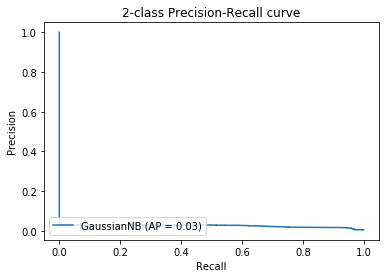

In [16]:
%matplotlib inline
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

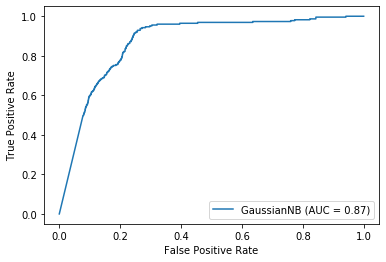

In [17]:
from sklearn.metrics import plot_roc_curve
roc = plot_roc_curve(clf, X_test, y_test)